# Analiza podatkov: Wikipedia
-----------------
### OPOZORILO: <font color="red">NE</font> pognati celega notebooka!
Nekaj celic se izvaja več kot minuto.

### Vsebina:
Preveriti bom želel naslednje delovne hipoteze in vprašanja, ki se bodo naravno pojavila ob gledanju podatkov.
#### Delovne hipoteze:
-   Predvidevam, da bodo članki veliko daljši, meli več hiperpovezav v jezikih z večjim številom naravnih govorcev.
-   Predvidevam, da so krajše besede pogosteje uporabljene kot daljše.
-   Ali imajo članki v različnih jezikih različno frekvenčno porazdelitev besed in črk?
-   Ali lahko predvidimo jezik v katerem je bil članek napisan na podlagi zajetih podatkov?


In [1]:
from pomozne_funkcije import *
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv.field_size_limit(1000000)
data_frame = pd.read_csv("podatki.csv", sep="¤", engine='python')
FIG_SIZE = (12, 6)

def plot_histogram(series, y_lab=""):
    plt.figure(figsize=FIG_SIZE, dpi=100)
    width = 0.5
    plt.bar(series.index, series.values, width=width)
    plt.bar(series[series.index == 'sl'].index, series[series.index == 'sl'].values, color='red', width=width)
    
    mean_score = series.mean()
    plt.axhline(mean_score, color='red', linestyle='--')
    plt.legend([f"Povprečje: {round(mean_score, 3)}"], loc="lower right")
    
    plt.ylabel(y_lab)
    plt.xticks(rotation=90)
    plt.show()

def plot_histogram_df(df, x_col, y_col, highlight_value, y_lab=""):
    plt.figure(figsize=FIG_SIZE, dpi=100)
    
    mean_score = df[y_col].mean()
    plt.axhline(mean_score, color='red', linestyle='--')
    plt.legend([f"Povprečje: {round(mean_score, 3)}"], loc="lower right")

    data = df[[x_col, y_col]]
    data = data.sort_values(y_col)
    plt.bar(data[x_col], data[y_col])
    if highlight_value in data[x_col].values:
        highlight_index = data[x_col].values.tolist().index(highlight_value)
        plt.bar(data[x_col].iloc[highlight_index], data[y_col].iloc[highlight_index], color='red')
    plt.ylabel(y_lab)
    plt.xticks(rotation=90)
    plt.show()

In [2]:
data_frame.head(10) # previmo, če so se podatki pravilno naložili


,jezik,povezave,besedilo
0,sl,77,Wikipedija (angleško Wikipedia) ali Vikipedija...
1,sl,15,Système universitaire de documentation (kratic...
2,sl,35,Wikiknjige (angleško Wikibooks) je sorodni pro...
3,sl,101,Dogovori o poimenovanju so seznam smernic za u...
4,sl,125,To so osnovna navodila in smernice za uporabo ...
5,sl,125,To so osnovna navodila in smernice za uporabo ...
6,sl,62,"Lutka ali marioneta, tudi nogavičnik (izvorno ..."
7,sl,36,\nWikipedija uporablja dve metodi za urejanje:...
8,sl,16,Wikipedija vsebuje veliko število seznamov. Nj...
9,sl,89,Seznam pravil Wikipedije na kratko povzema vsa...


### Dolžina člankov in besed
Poglejmo velikost povprečnega članka glede na jezik.
To bomo storili na dva načina. Izračuna povprečni števili:
1. znakov v članku
2. besed v članku

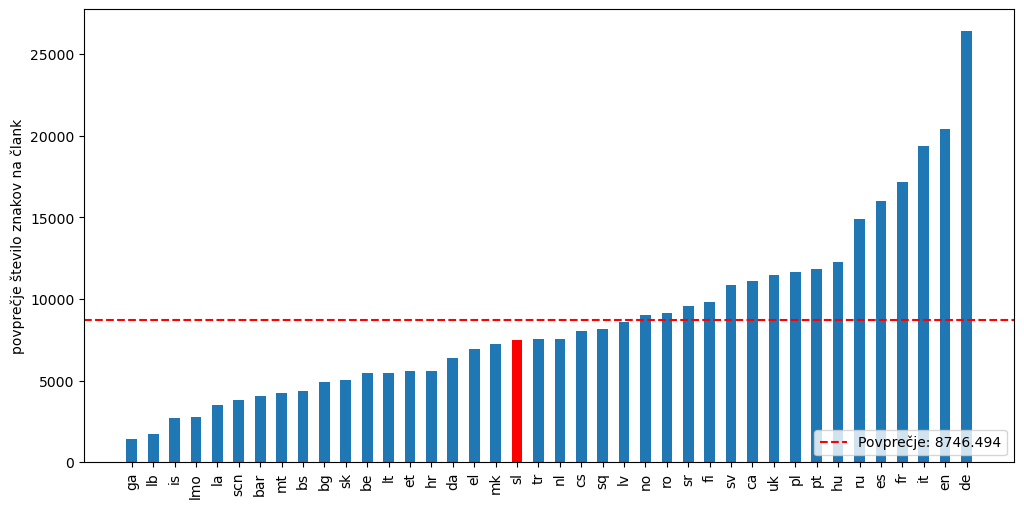

In [3]:
data_frame['dolzina_1'] = data_frame['besedilo'].apply(lambda x: len(x))
grouped_1 = data_frame.groupby('jezik')['dolzina_1'].sum()/200
grouped_1 = grouped_1.sort_values()
plot_histogram(grouped_1,y_lab="povprečje število znakov na člank")

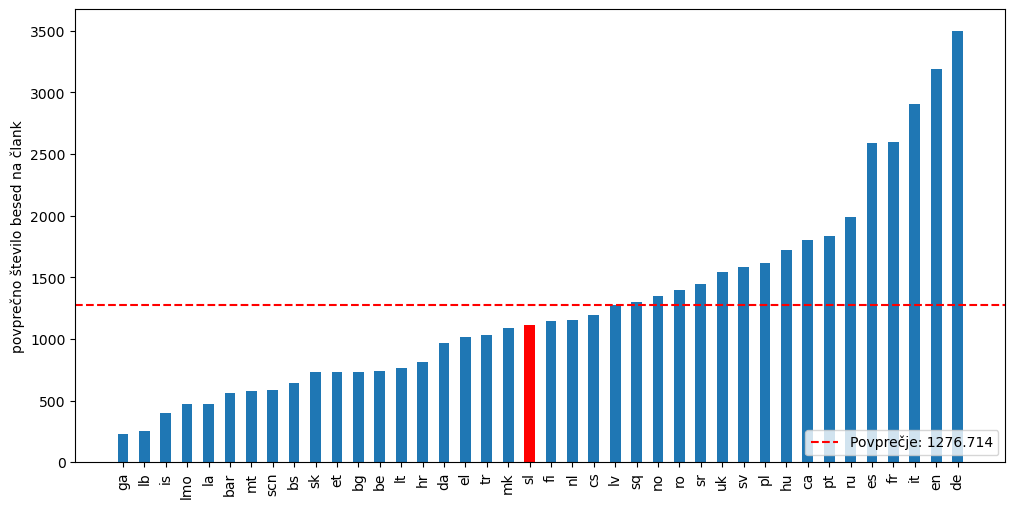

In [4]:
data_frame['dolzina_2'] = data_frame['besedilo'].apply(lambda x: num_of_spaces(x))
grouped_2 = data_frame.groupby('jezik')['dolzina_2'].sum()/200
grouped_2 =  grouped_2.sort_values()
plot_histogram(grouped_2, y_lab="povprečno število besed na člank")

In [5]:
grouped_2.tail(10) # izpis držav z največjim povprečnim številom na članek.

jezik
pl    1615.500
hu    1721.255
ca    1803.560
pt    1839.675
ru    1987.670
es    2586.000
fr    2595.215
it    2907.210
en    3193.710
de    3498.255
Name: dolzina_2, dtype: float64

Opazimo, da je prišlo da manjših sprememb v razvrstitvah med 1. in 2. histogramom, iz česar lahko sklepamo, da je povprečna dolžina besede različna v različnih jezikih.
Presenetljivo je Nemščina na 1. mestu. 
Kljub temu lahko do neke mere opazimo korelacijo med številom naravnih govorcev in dolžino članka.

Preverimo še povprečno dolžino besed v različnih jezikih. To bomo naredimo na dva načina:
1.	Povprečna dolžina besed, kjer bomo šteli besede tolikokrat, kolikokrat se pojavijo v besedilu.
2.	Povprečna dolžina besed, kjer vsako besedo, ki se pojavi štejemo le enkrat.


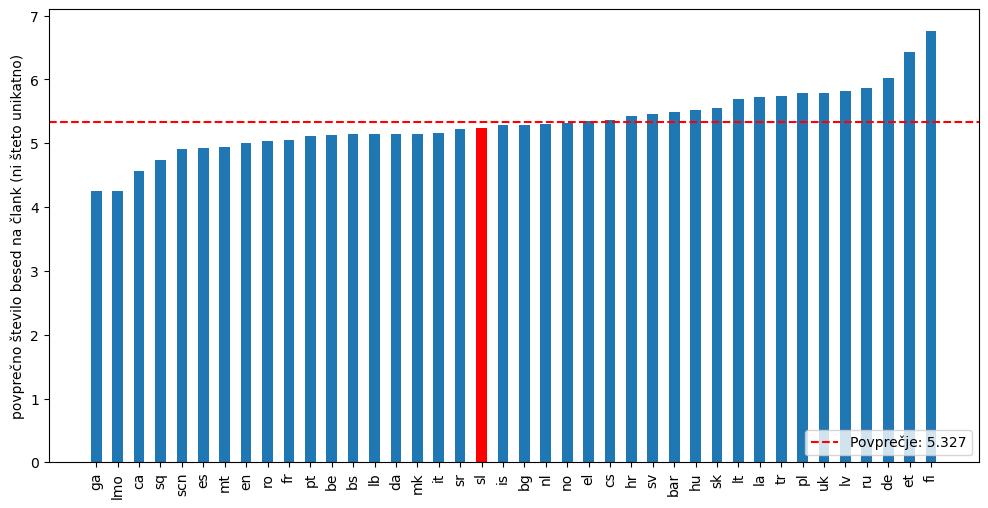

In [6]:
data_frame['dolzina_3'] = data_frame['besedilo'].apply(lambda x: (avg_word_len(x)))
grouped_3 = data_frame.groupby('jezik')['dolzina_3'].sum()/200
grouped_3 =  grouped_3.sort_values()
plot_histogram(grouped_3, y_lab="povprečno število besed na člank (ni šteto unikatno)")

Povprečna beseda je dolga 5.3 znake. Med vključenimi jeziki ima najdaljše besede Finščina najkrajše pa Irščina in Lombardščina (sever Italije). 

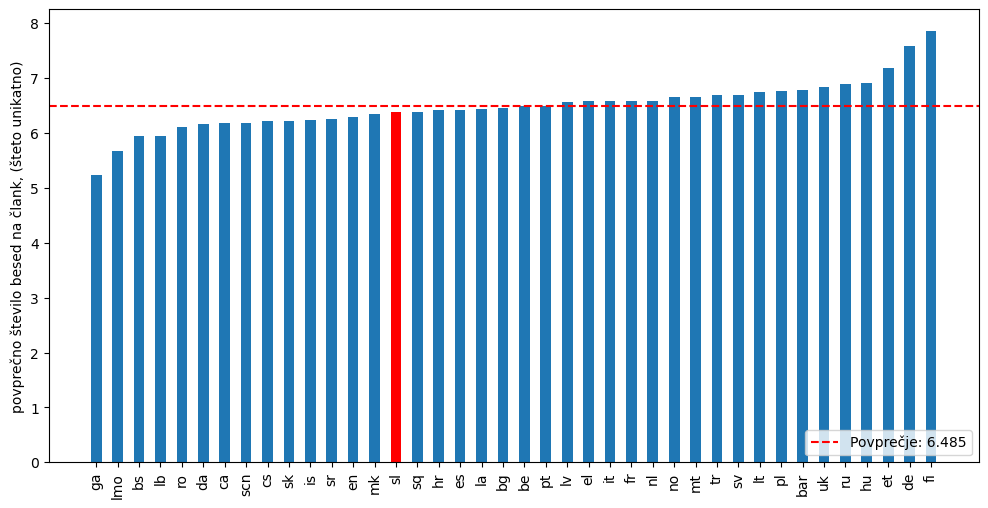

In [7]:
data_frame['dolzina_3'] = data_frame['besedilo'].apply(lambda x: (average_word_length_2(x)))
grouped_3 = data_frame.groupby('jezik')['dolzina_3'].sum()/200
grouped_3 =  grouped_3.sort_values()
plot_histogram(grouped_3, y_lab="povprečno število besed na člank, (šteto unikatno)")

Ker je povprečna dolžina besed narastla (iz 5.3 na 6.5) sedaj, ko jih štejemo unikatno, lahko sklepamo, da so krajše besede pogosteje uporabljene.

Poglejmo si še povprečno število hiper povezav. Predvidevam, da bo vrstni red držav glede na število hiperpovezav podoben vrstnemu red dolžine člankov.

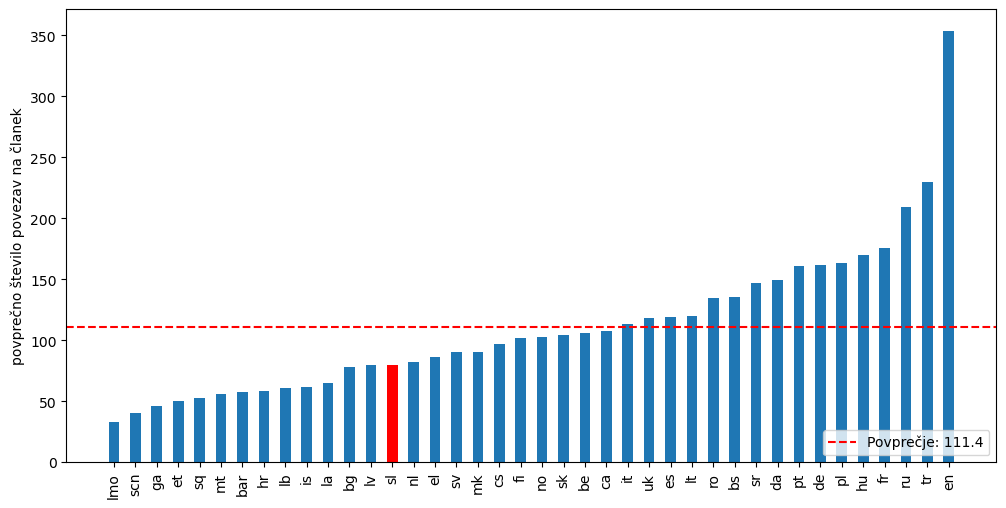

In [8]:
grouped_3 = data_frame.groupby('jezik')['povezave'].sum()/200
grouped_3 = grouped_3.sort_values()
plot_histogram(grouped_3, y_lab="povprečno število povezav na članek")

In [9]:
grouped_3.tail(10)

jezik
sr    147.245
da    149.770
pt    161.280
de    162.025
pl    163.150
hu    170.135
fr    175.895
ru    209.715
tr    229.825
en    353.675
Name: povezave, dtype: float64

Vrstni red je nekoliko premešan. Kljub temu rezultati niso preveč presenetljivi. Kljub temu lahko opazimo predviden trend.

<h4>Frekvenčna porazdelitev znakov in besed


Sledi graf frkvenčne porezdelitve znakov.

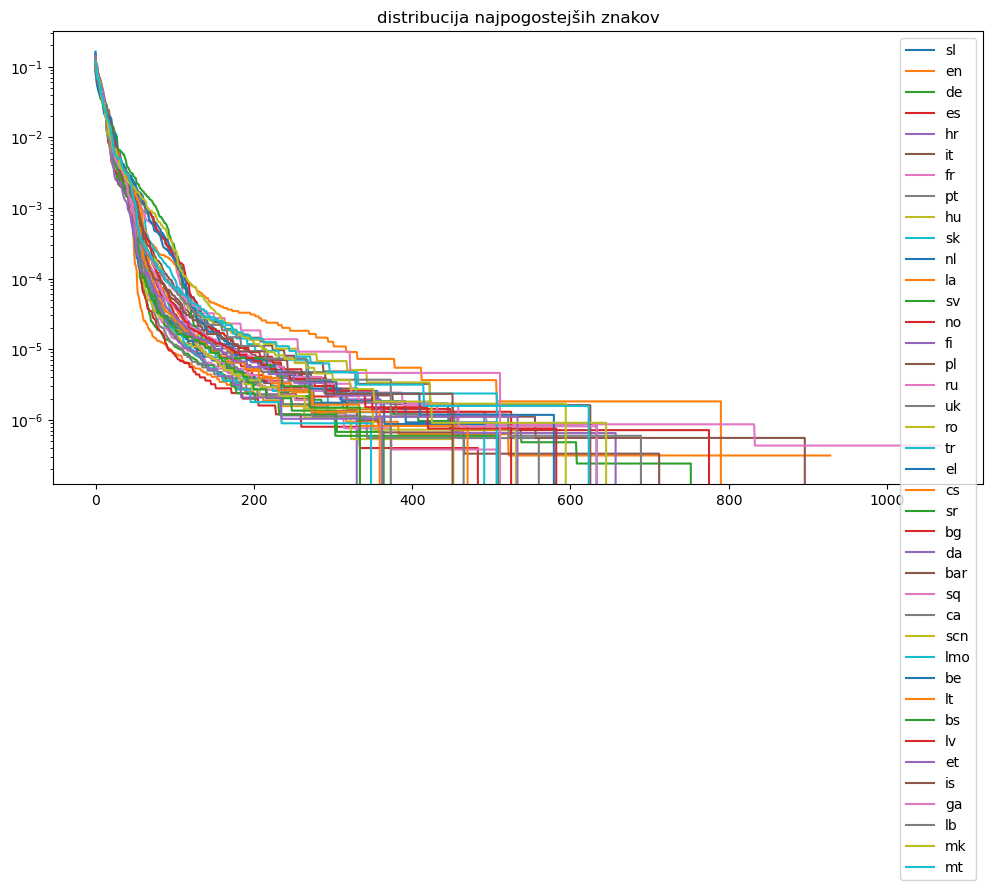

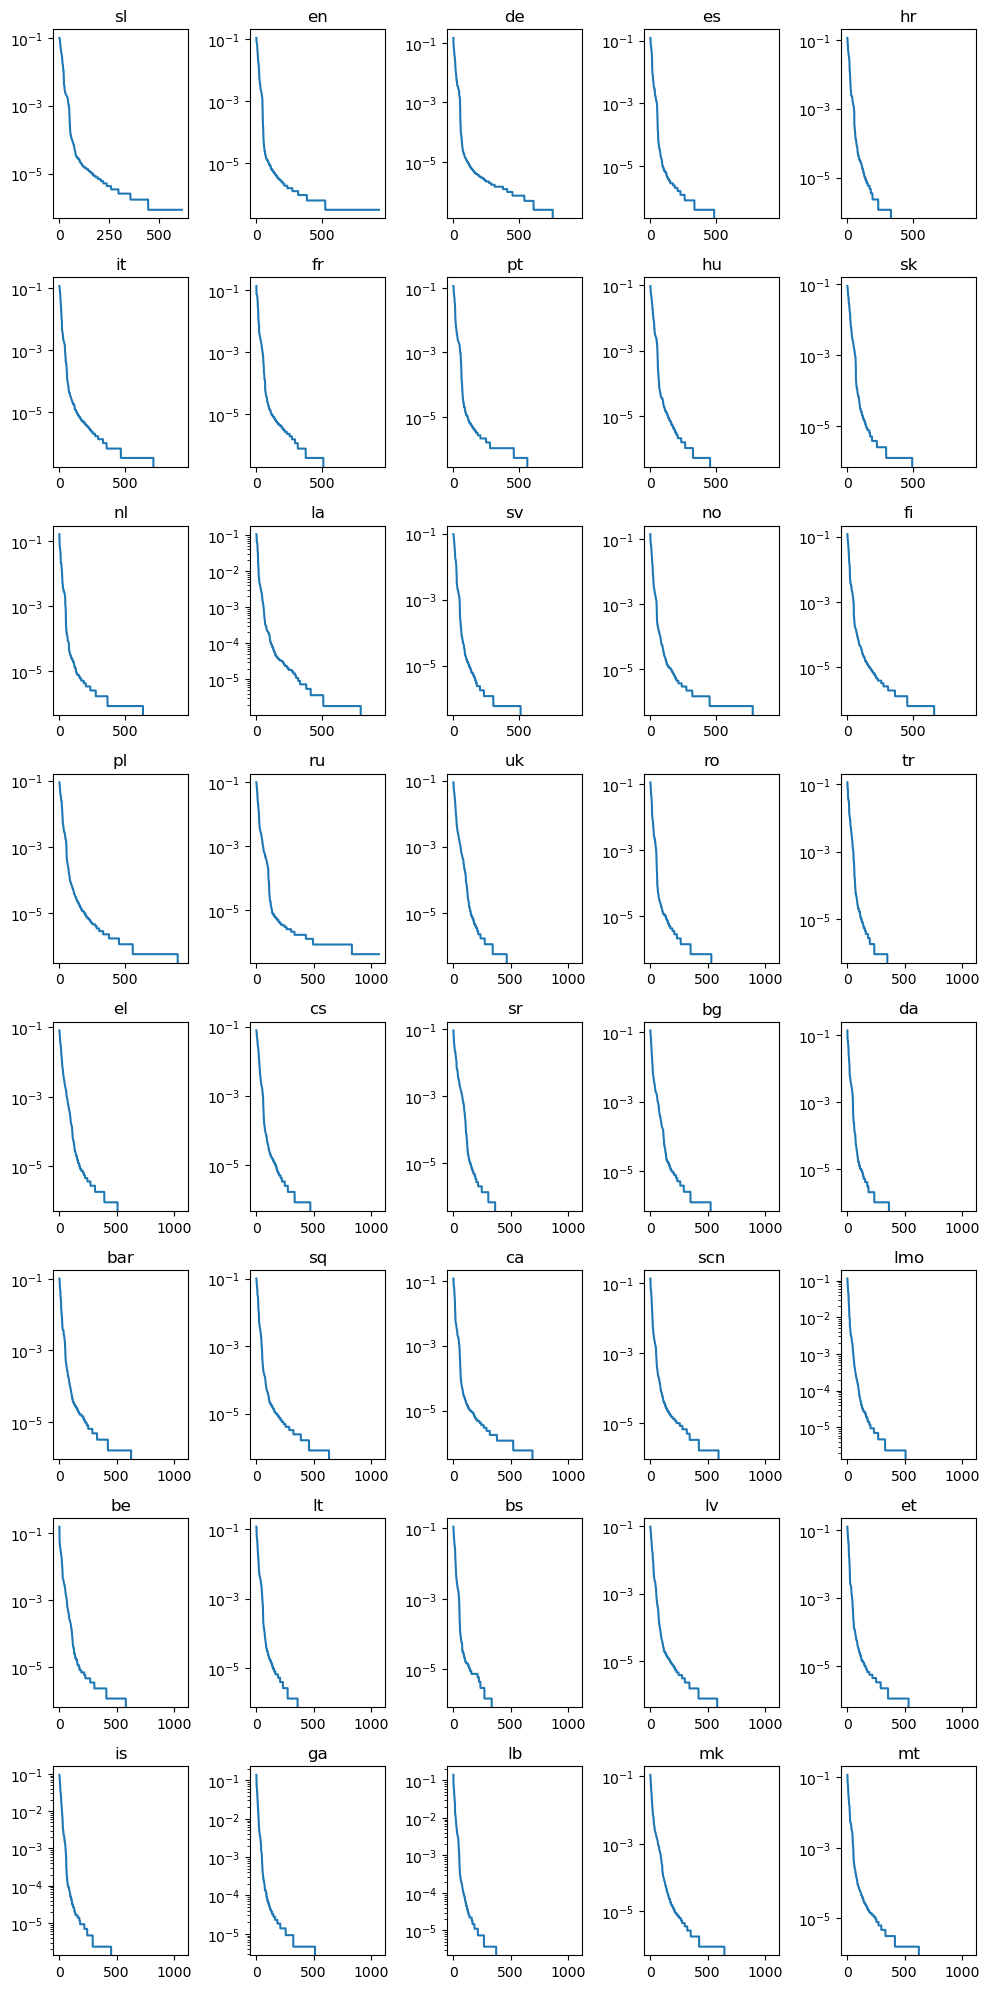

In [10]:
data = letter_frequency_destribution(data_frame)
plt.figure(figsize=FIG_SIZE, dpi=100)
for lang, y_points in data:
    plt.plot(y_points, label=lang)
plt.yscale("log")
plt.legend(loc="lower right")
plt.title(f"distribucija najpogostejših znakov")
plt.legend()
plt.show()
plt.figure(figsize=(10, 20), dpi=100)
for i, (lang, y_points) in enumerate(data):
    plt.subplot(8, 5, i + 1)
    plt.plot(y_points, label=lang)
    plt.title(lang)
    plt.yscale("log")

plt.tight_layout()
plt.show()


Rezultate je teško interpretirati. Ponovil bom poiskus, kjer bom upošteval le 40 napogosteje se pojavljajočih znakov v vsakem jeziku. Tokrat ne bom razlikoval med velikimi in malimi črkami.

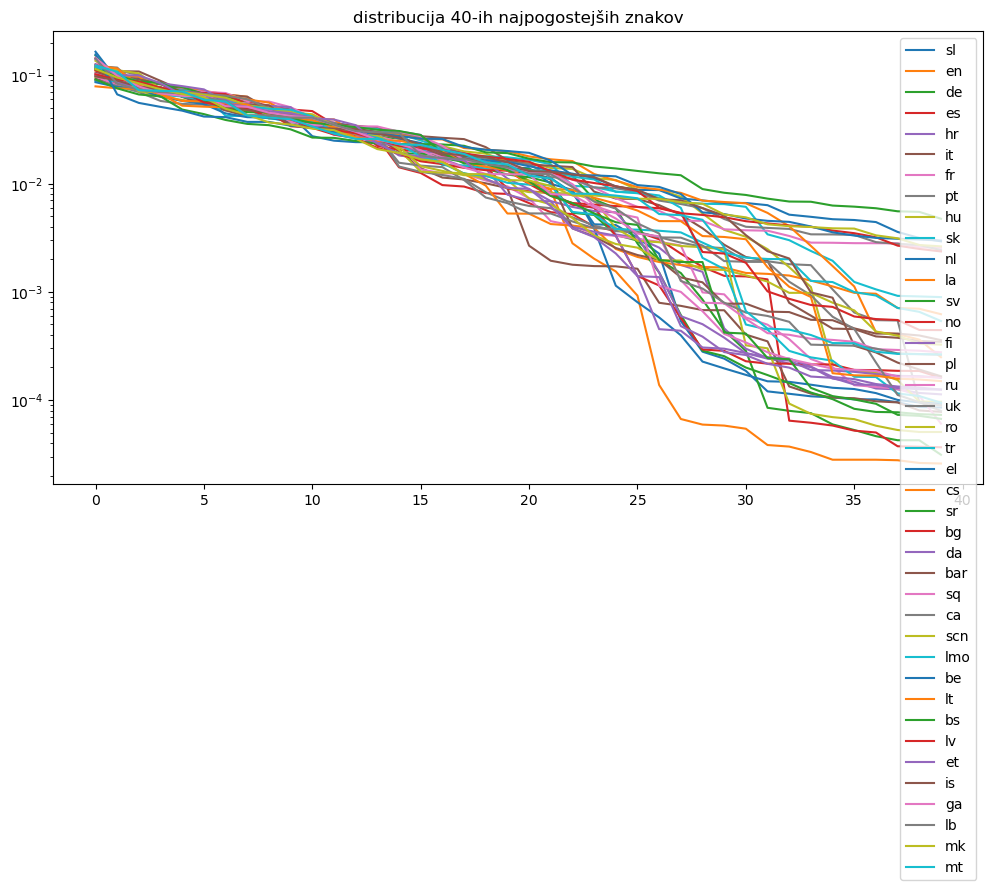

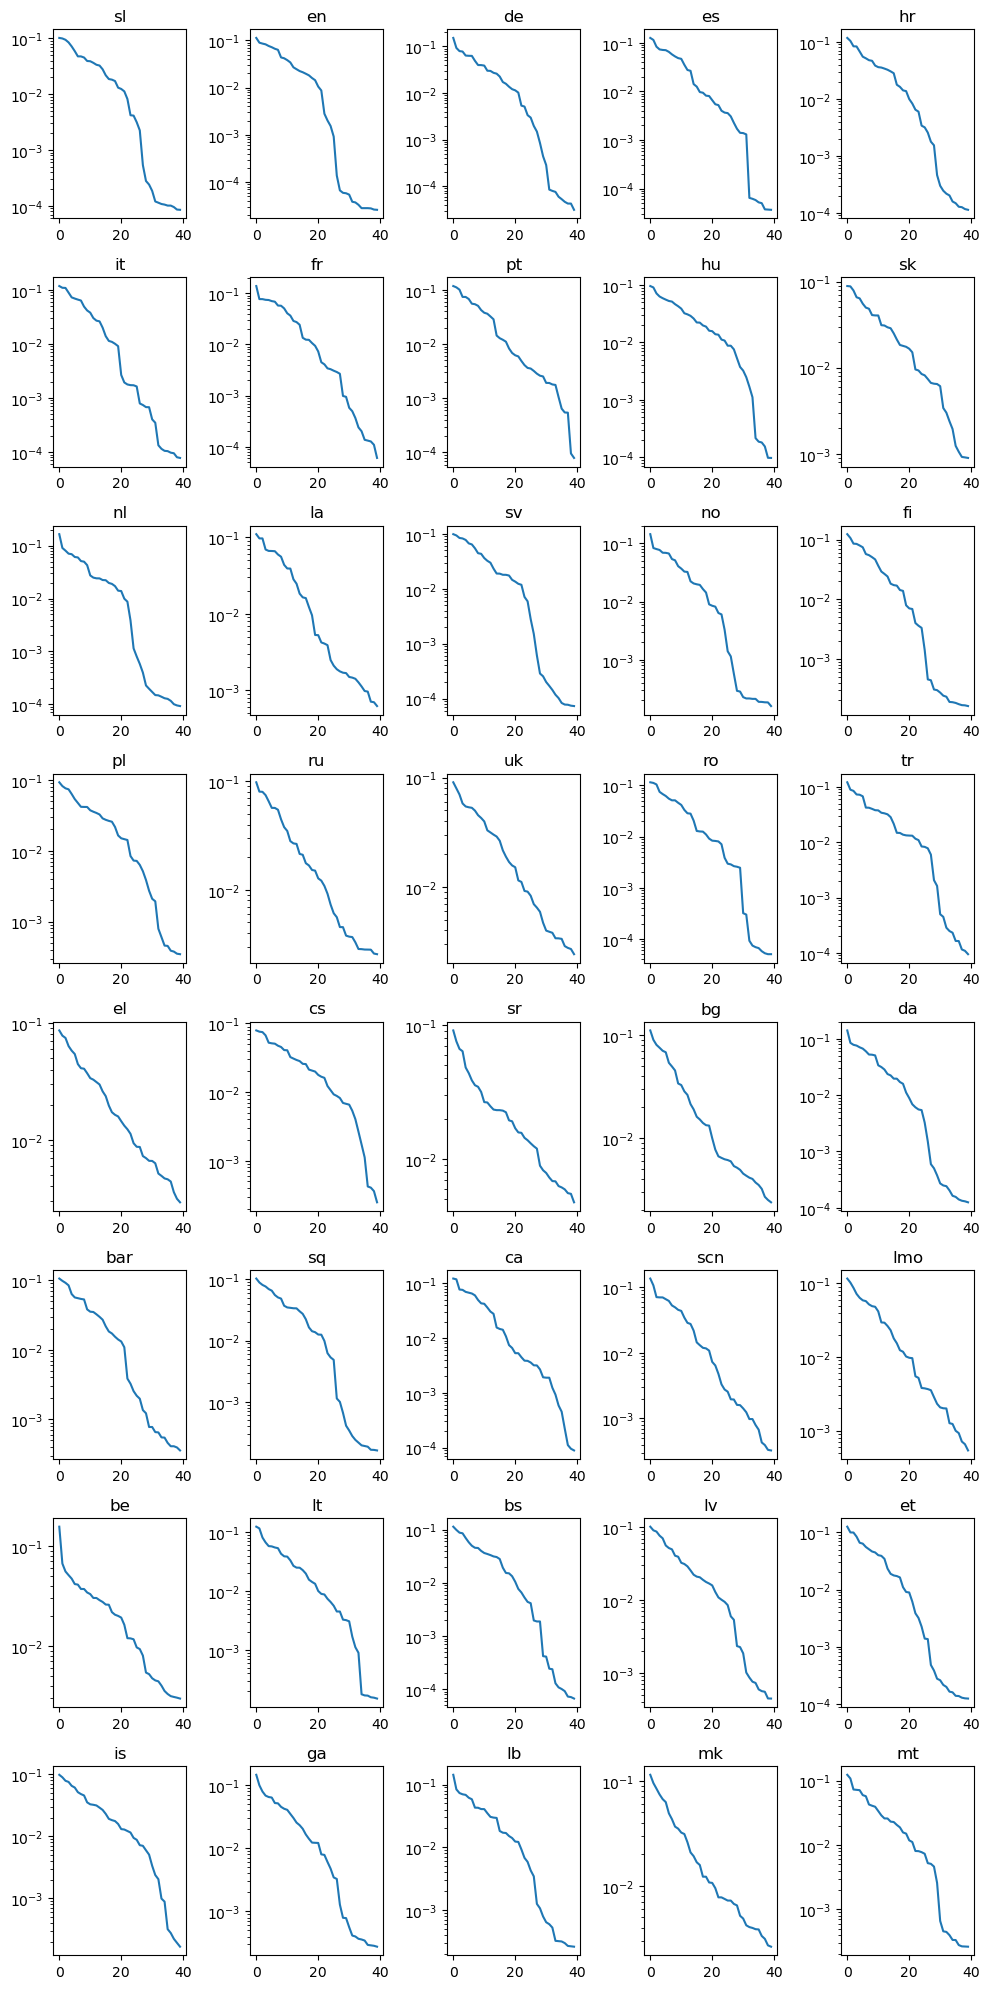

In [11]:
data = improved_letter_frequency_destribution(data_frame)
plt.figure(figsize=FIG_SIZE, dpi=100)
for lang, y_points in data:
    plt.plot(y_points, label=lang)
plt.yscale("log")
plt.legend(loc="lower right")
plt.title(f"distribucija 40-ih najpogostejših znakov")
plt.legend()
plt.show()
plt.figure(figsize=(10, 20), dpi=100)
for i, (lang, y_points) in enumerate(data):
    plt.subplot(8, 5, i + 1)
    plt.plot(y_points, label=lang)
    plt.title(lang)
    plt.yscale("log")

plt.tight_layout()
plt.show()

Pri skoraj vseh jezikih opazimo, da pogostost prvih nekaj znakov pada linearno (glede na logaritemsko skalo). Zanimivo bi bilo vedeti zakaj so tako velike razlike.

Poglejmo še frekvenčno porazdelitev besed. Prikazani so grafi frekvenčne porazdelitve za 10, 100 in 1000 najpogosteje se pojavljajočih besed. Zraven posameznih jezikov bo pisalo kakšen delež člankov predstavlja ta del besed. Pri 10 najpogostejših besedah bo tudi napisano katere so te besede pri posameznih grafih.

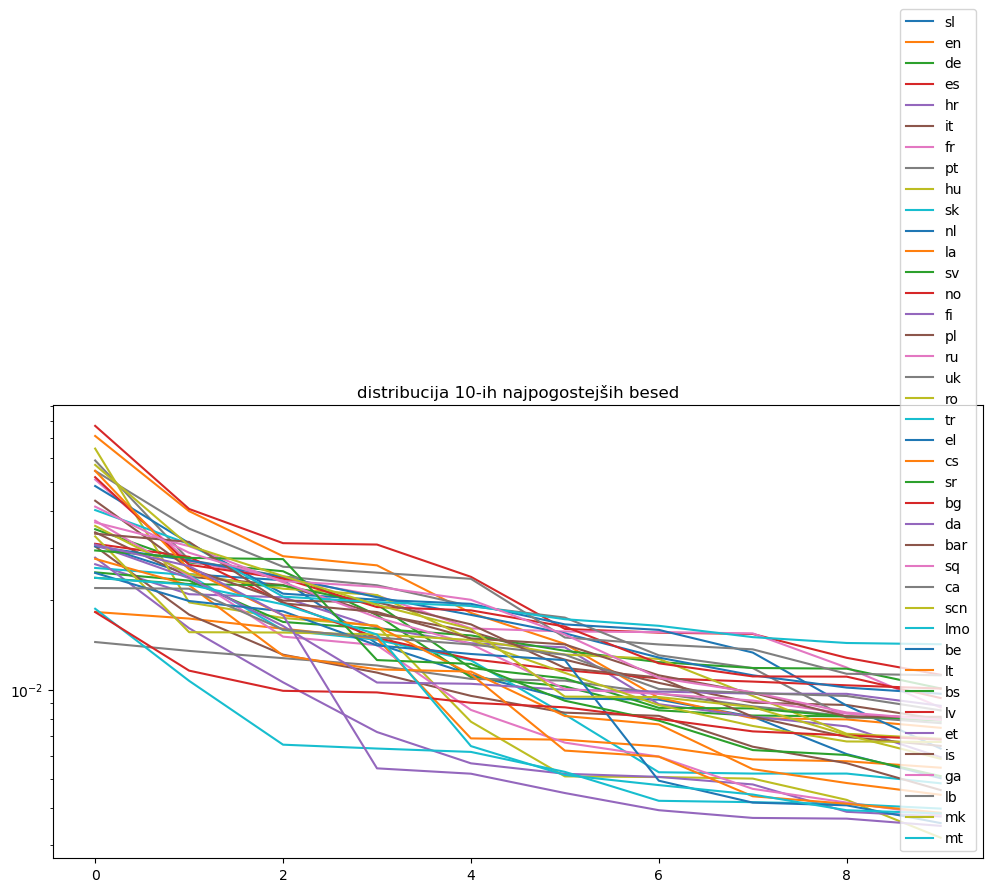

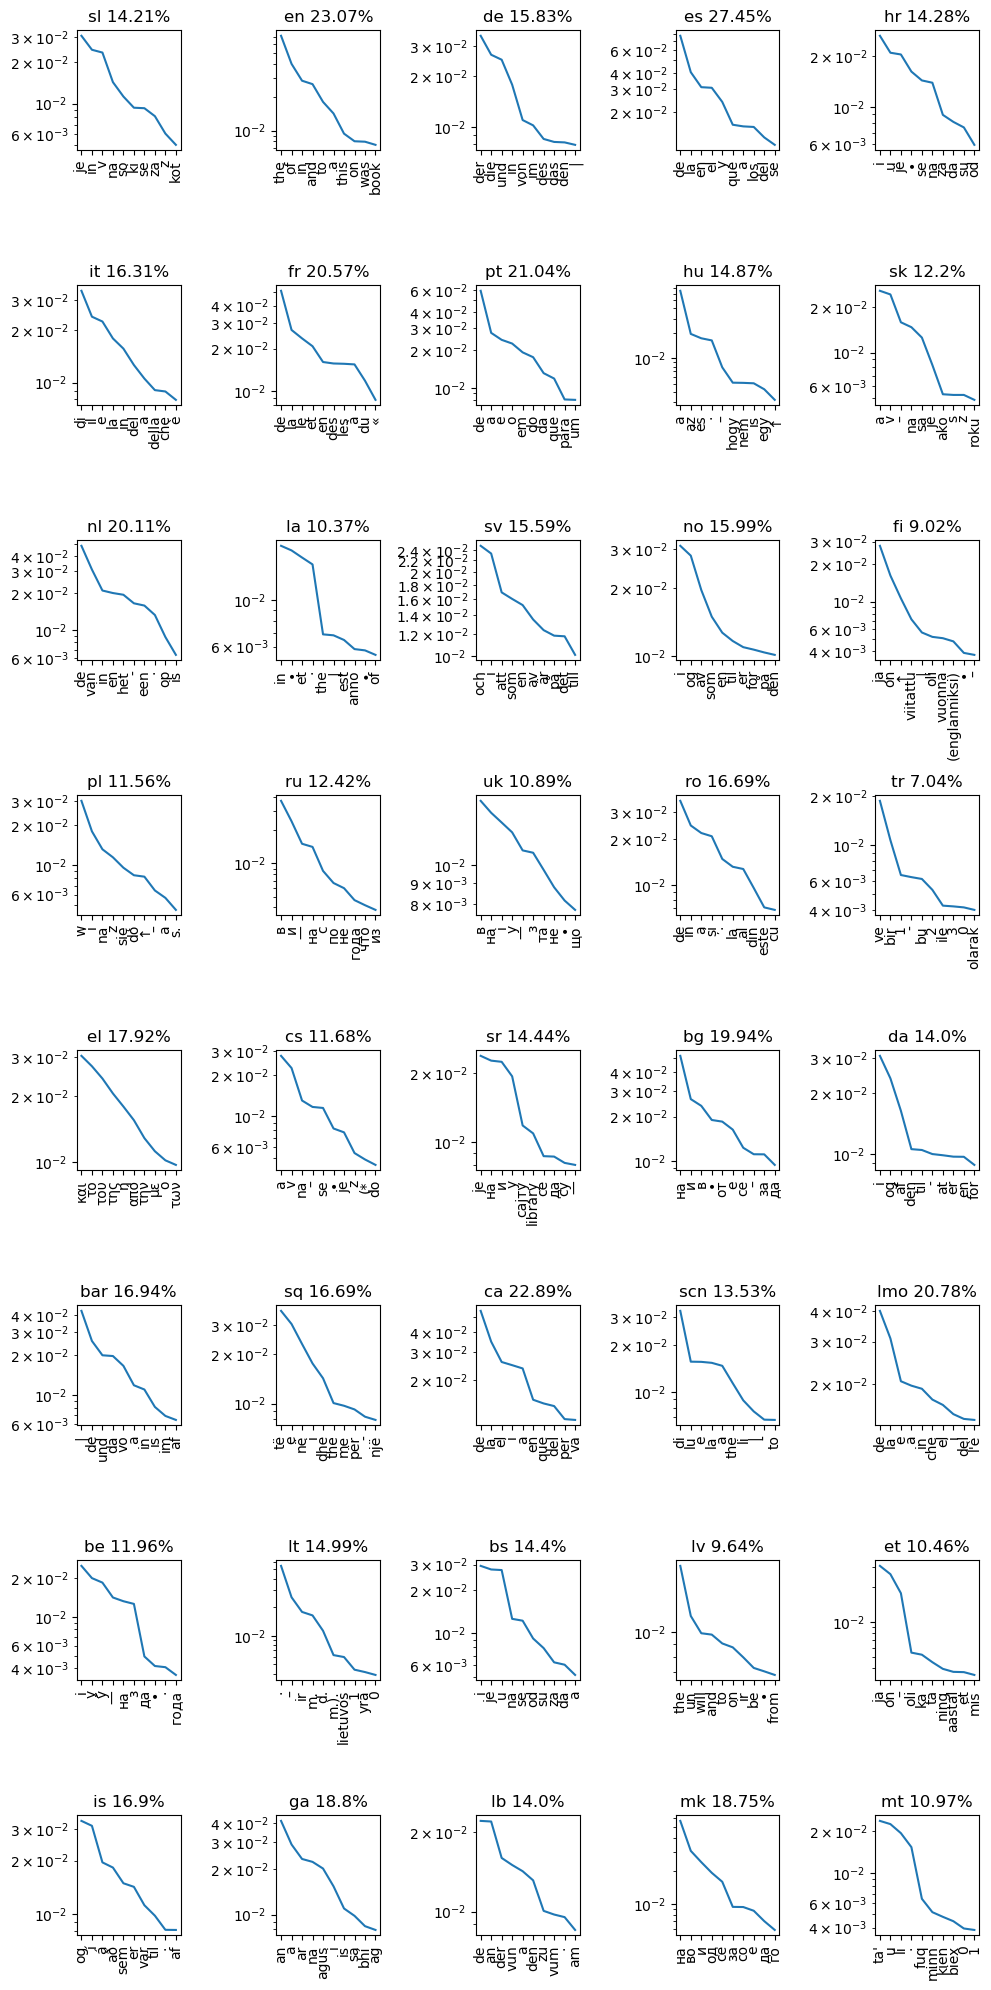

In [12]:
data = improved_word_frequency_destribution(data_frame, 10, words=True)
plt.figure(figsize=FIG_SIZE, dpi=100)
for lang, y_points in data:
    plt.plot([i[1] for i in y_points], label=lang)
plt.yscale("log")
plt.legend(loc="lower right")
plt.title(f"distribucija 10-ih najpogostejših besed")
plt.show()

fig, axs = plt.subplots(8, 5, figsize=(10, 20), dpi=100)
axs = axs.flatten()

for i, (lang, y_points) in enumerate(data):
    ax = axs[i]
    ax.plot([i[1] for i in y_points], label=lang)
    ax.set_xticks([i for i in range(len(y_points))])
    ax.set_xticklabels([i[0] for i in y_points], rotation=90)
    ax.set_yscale("log")
    ax.set_title(lang + f" {round(sum([i[1] for i in y_points]) * 100, 2)}%")

plt.tight_layout()
plt.show()

Tu se pokaže, da ta statistika ne predstavlja najbolje splošnega jezika saj se npr. v Angleščini na 10. Mestu pojavi book, ki pa skoraj gotovo ni ena izmed 10-ih najpogostejših angleških besed.

Tu se tudi ponovno pokaže, da je večina najpogostejših besed zelo kratkih.

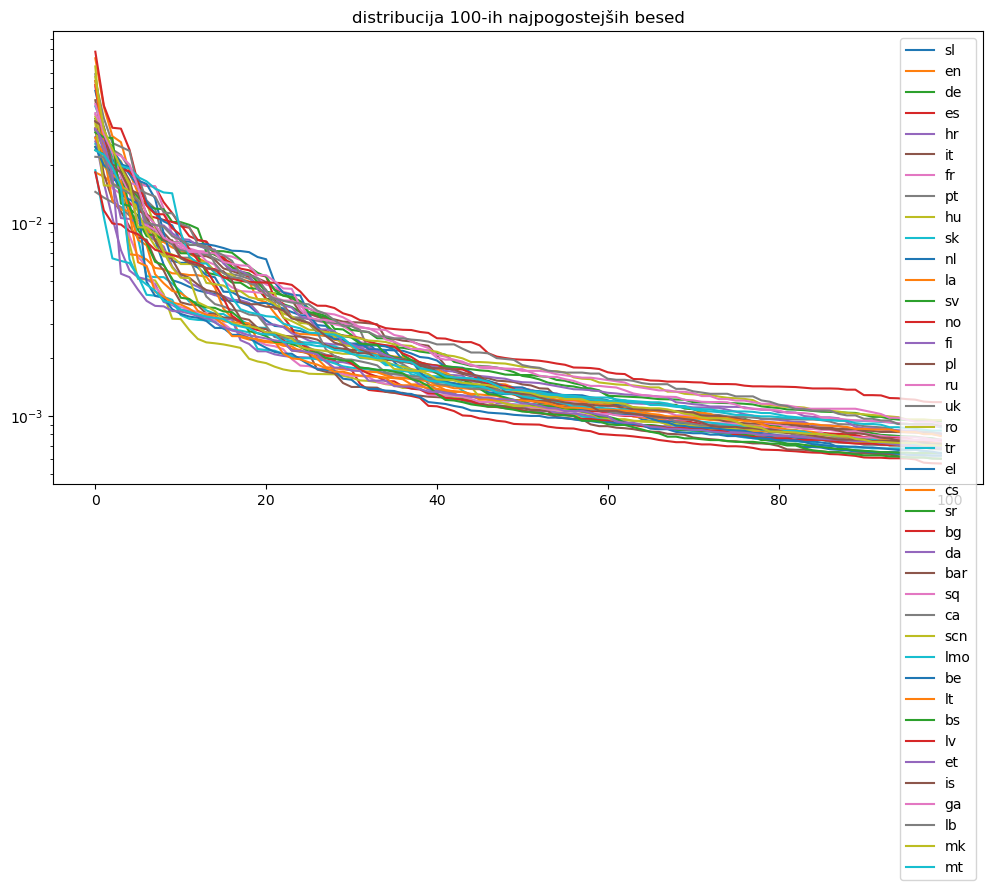

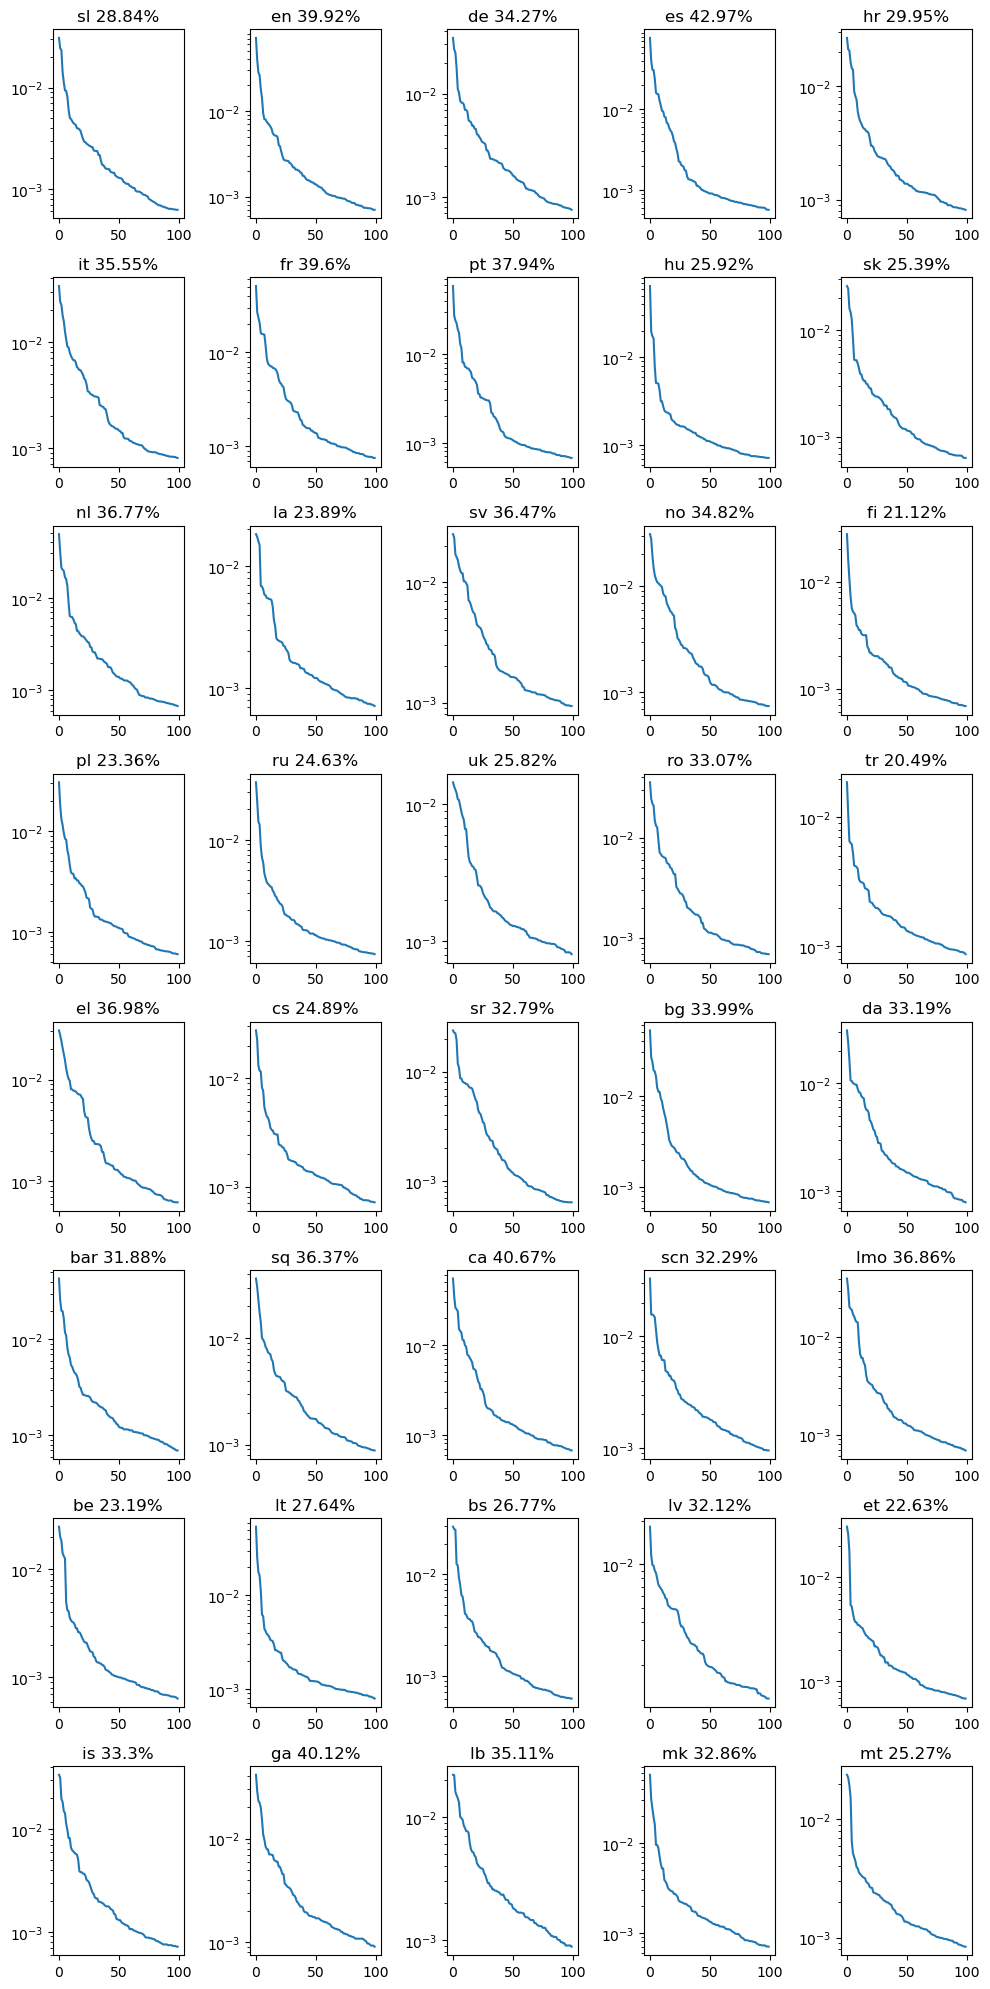

In [13]:
data = improved_word_frequency_destribution(data_frame, 100)

plt.figure(figsize=FIG_SIZE, dpi=100)
for lang, y_points in data:
    plt.plot(y_points, label=lang)
plt.yscale("log")
plt.legend(loc="lower right")
plt.title(f"distribucija 100-ih najpogostejših besed")
plt.legend()
plt.show()
plt.figure(figsize=(10, 20), dpi=100)
for i, (lang, y_points) in enumerate(data):
    plt.subplot(8, 5, i + 1)
    plt.plot(y_points, label=lang)
    plt.title(lang + f" {round(sum(y_points) * 100, 2)}%")
    plt.yscale("log")

plt.tight_layout()
plt.show()

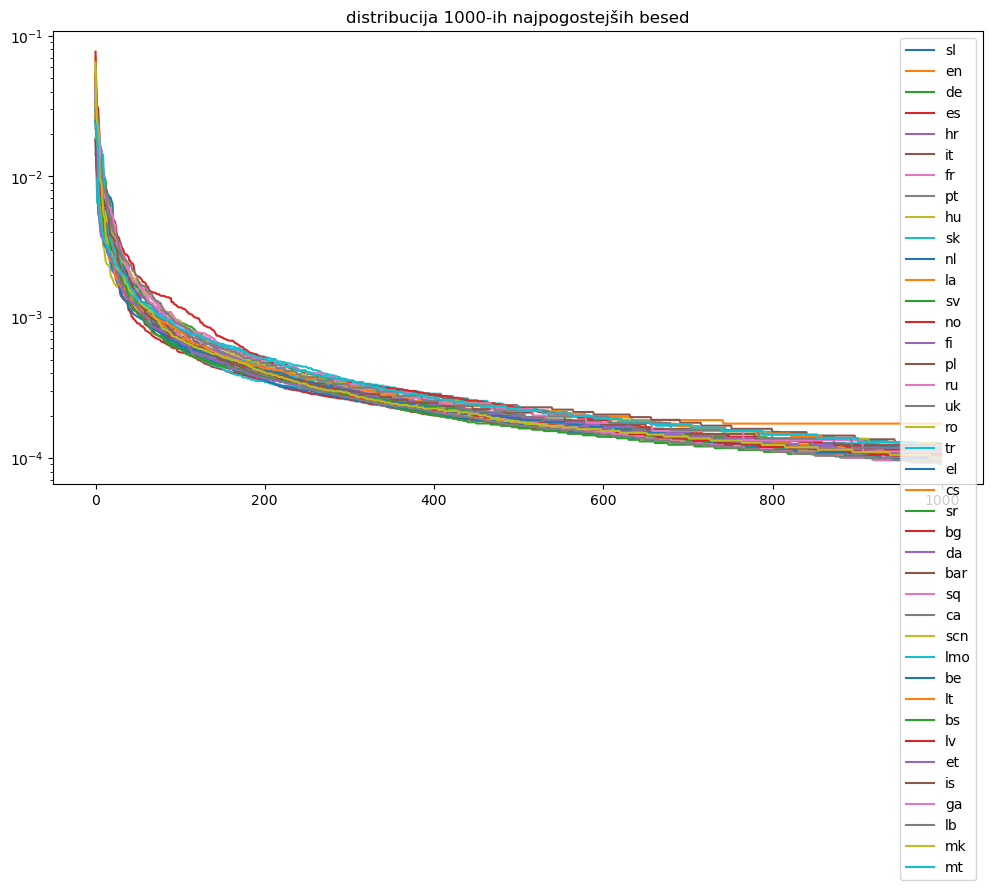

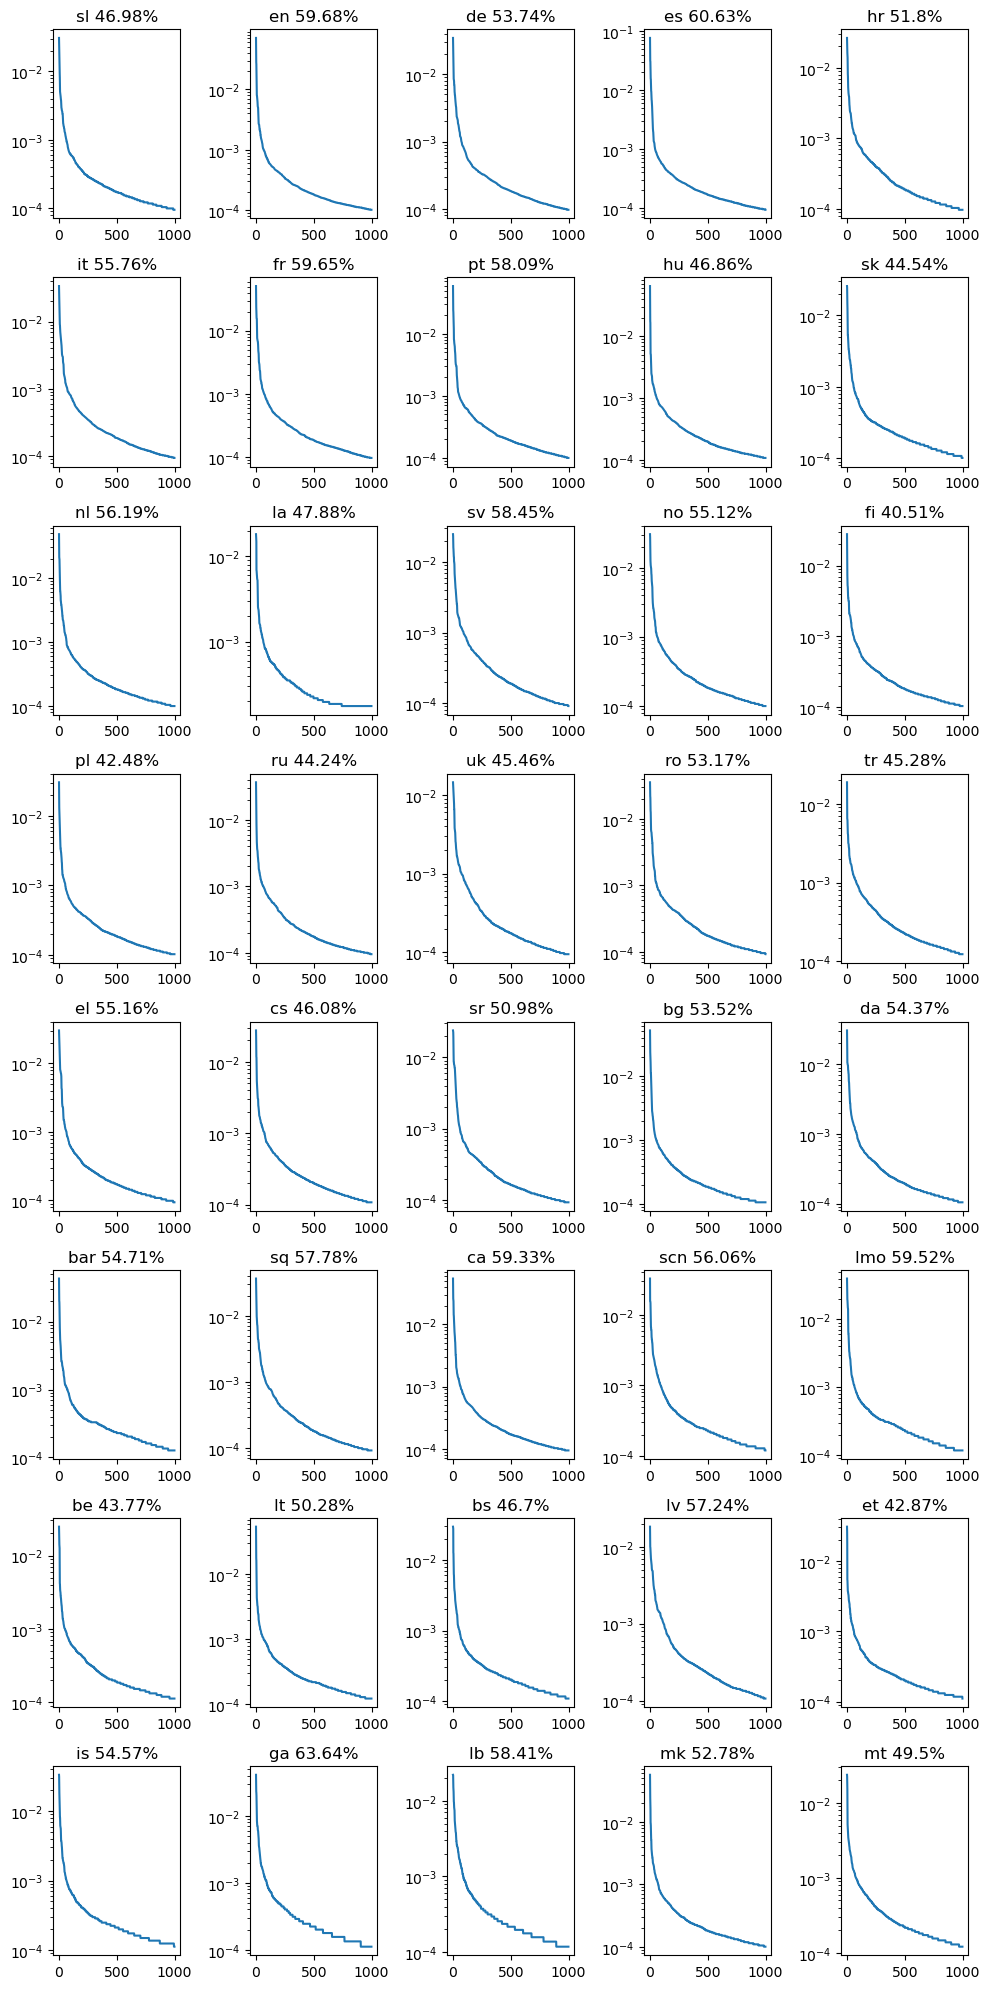

In [14]:
data = improved_word_frequency_destribution(data_frame, 1000)
plt.figure(figsize=FIG_SIZE, dpi=100)
for lang, y_points in data:
    plt.plot(y_points, label=lang)
plt.yscale("log")
plt.legend(loc="lower right")
plt.title(f"distribucija 1000-ih najpogostejših besed")
plt.legend()
plt.show()
plt.figure(figsize=(10, 20), dpi=100)
for i, (lang, y_points) in enumerate(data):
    plt.subplot(8, 5, i + 1)
    plt.plot(y_points, label=lang)
    plt.title(lang + f" {round(sum(y_points) * 100, 2)}%")
    plt.yscale("log")

plt.tight_layout()
plt.show()

Vidimo, da kljub logaritemski  skali, grafi padajo zelo hitro. Iz tega lahko sklepamo, da velik del jezika sestavlja relativno majhno število besed. To drži res za vse jezike, ki jih opazujemo.

<h4>Algoritmično predvidevanje jezika, ki ga opazujemo.

Naslednji histogrami bodo prikazovali kako uspešno lahko predvidimo v katerem jeziku je bil napisan članek z naivninim Bayesovim klasifikator.
Metoda: ločimo članke na dva kupa. Za treniranje jih bomo uporabili 150 in za preverjanje 50. 
Pri prvem bomo gledali zgolj en znak, pri drugem dva zaporedna znaka, pri tretjem tri in pri četrtem štiri.

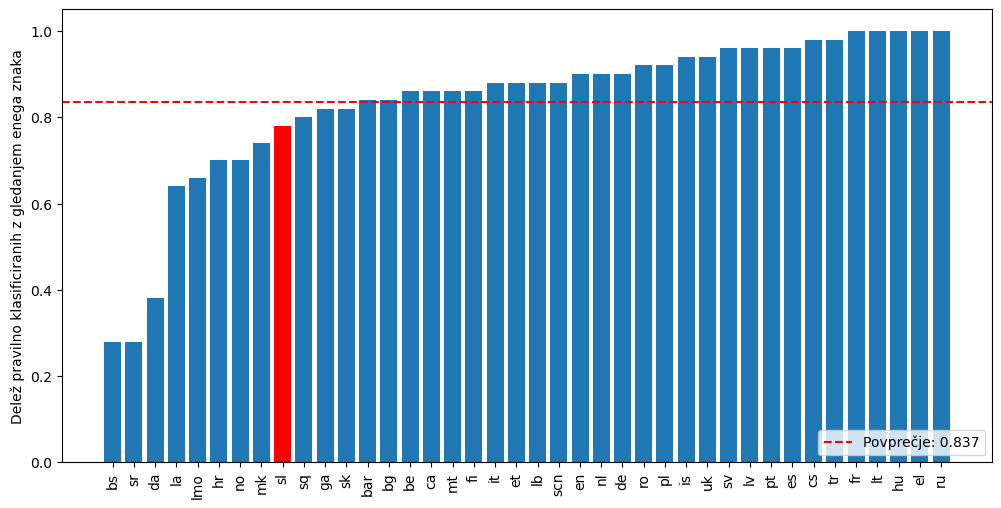

In [15]:
data_frame_1 = wrap_testing(data_frame, [1], 150, 50)
data_frame_1 = data_frame_1.sort_values("Delež pravilno klasificiranih")
plot_histogram_df(data_frame_1, "Jezik", "Delež pravilno klasificiranih", "sl", y_lab="Delež pravilno klasificiranih z gledanjem enega znaka")

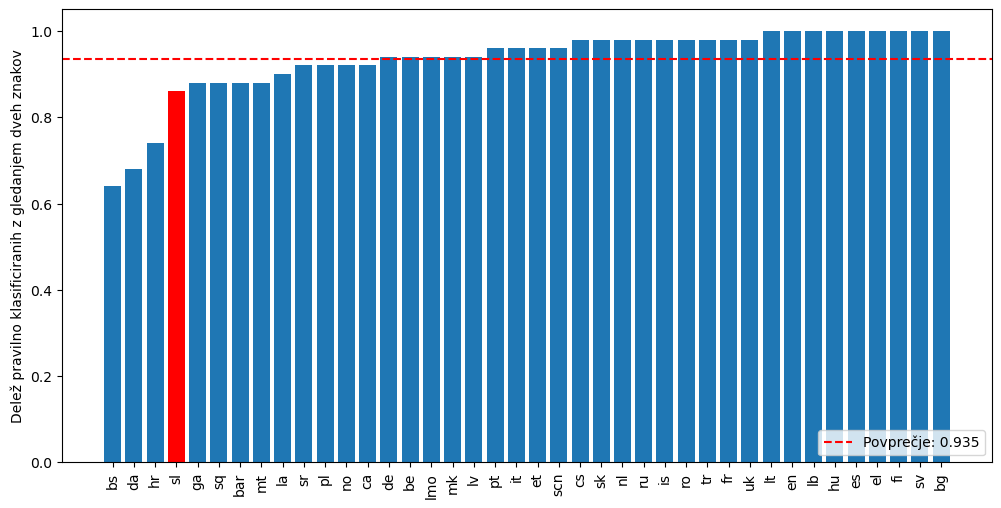

In [16]:
data_frame_1 = wrap_testing(data_frame, [2], 150, 50)
data_frame_1 = data_frame_1.sort_values("Delež pravilno klasificiranih")
plot_histogram_df(data_frame_1, "Jezik", "Delež pravilno klasificiranih", "sl", y_lab="Delež pravilno klasificiranih z gledanjem dveh znakov")

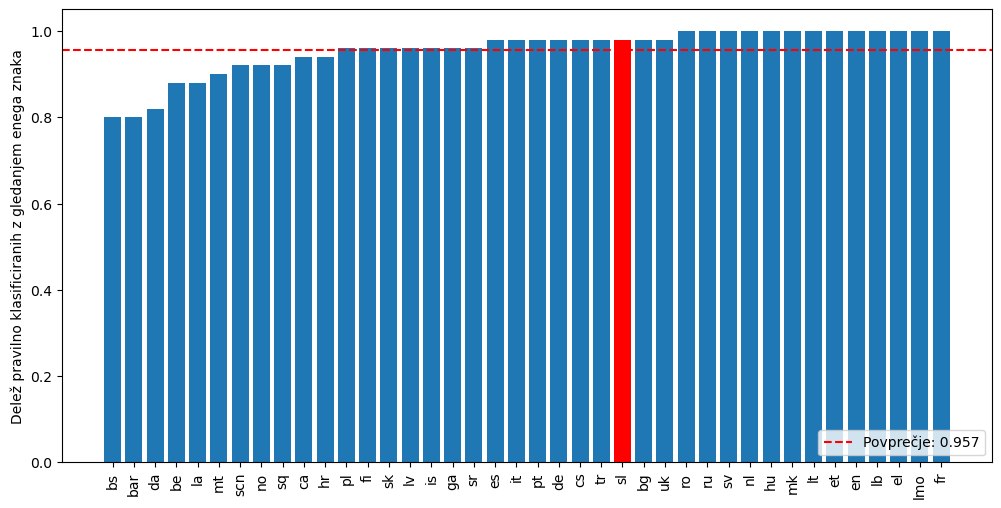

In [17]:
data_frame_1 = wrap_testing(data_frame, [3], 150, 50)
data_frame_1 = data_frame_1.sort_values("Delež pravilno klasificiranih")
plot_histogram_df(data_frame_1, "Jezik", "Delež pravilno klasificiranih", "sl", y_lab="Delež pravilno klasificiranih z gledanjem enega znaka")

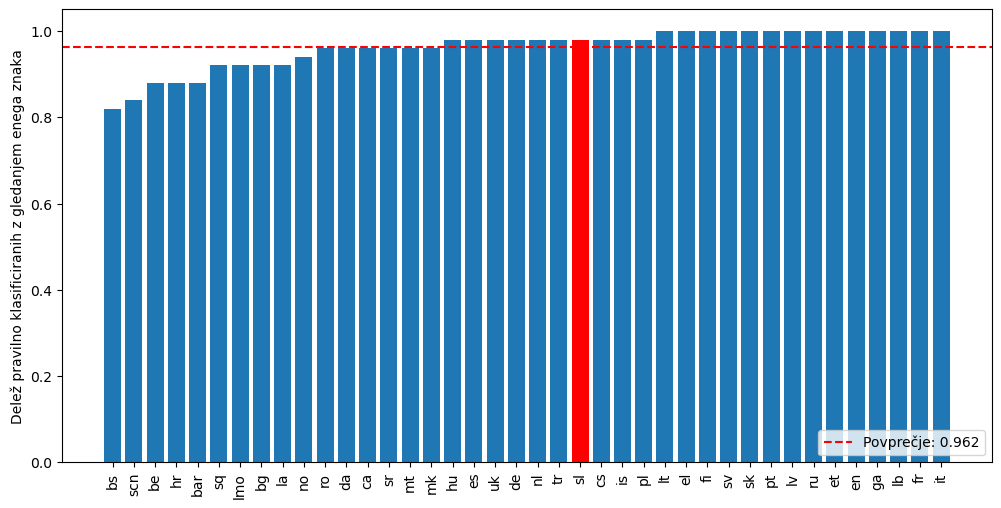

In [18]:
data_frame_1 = wrap_testing(data_frame, [4], 150, 50)
data_frame_1 = data_frame_1.sort_values("Delež pravilno klasificiranih")
plot_histogram_df(data_frame_1, "Jezik", "Delež pravilno klasificiranih", "sl", y_lab="Delež pravilno klasificiranih z gledanjem enega znaka")

Rezultati se lahko nekoliko razlikujejo med posameznimi zagoni, saj so podaki ločeni naključno.
Pri tem zagonu smo 84% člankov lahko uganil pravilno z zgolj enim znakom. 
Pri dveh zaporedjih znakih je uspešnost narastla na 94%. 
Pri treh in štirih znakih je natančnost podobna in je okoli 96%.
Za boljšo uspešnost bi verjetno potreboval nekoliko močnejšo metodo kot preverjanje zaporednih črk ali pa večjo količino podatkov.


## Povzetek
-   Dolžina člankov in število hiperpovezav je nekoliko povezana z številom naravnih govorcev.
-   Ugotovili smo tudi, da velik del jezika predstavlja zelo majhno število besed. Velike razlike se pojavijo tudi med pogostostjo znakov/črk in (presenetljivo) to opažanje drži v vseh opazovanih jezikih.
-   Kljub temu, je lahko večino jezikov ločimo z zelo preprostimi metodami (za nekaj pa bi potrebovali nekoliko manj naivno rešitev).